In [51]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
%store -r subjects
%store -r eeg_final
%store -r stimulus
%store -r master_df

In [53]:
master_df.columns

Index(['Unnamed: 0', 'id', 'indra_time', 'browser_latency', 'reading_time',
       'attention_esense', 'meditation_esense', 'eeg_power', 'raw_values',
       'signal_quality', 'createdAt', 'updatedAt', 'label', 'delta', 'theta',
       'low_alpha', 'high_alpha', 'low_beta', 'high_beta', 'low_gamma',
       'mid+gamma', 'Session', 'Seen video before?', 'Chosen color',
       'Saw icons?', 'Gender', 'Wear contacts'],
      dtype='object')

# Relabel everything into Broader categories

In [54]:
math_labels = ['math1','math2','math3','math4','math5','math6','math7',
               'math8','math9','math10','math11','math12']
colour_labels = ['colorRound1-1', 'colorRound1-2', 'colorRound1-3', 'colorRound1-4',
       'colorRound1-5', 'colorRound1-6', 'colorRound2-1',
       'colorRound2-2', 'colorRound2-3', 'colorRound2-4', 'colorRound2-5',
       'colorRound2-6', 'readyRound3', 'colorRound3-1', 'colorRound3-2',
       'colorRound3-3', 'colorRound3-4', 'colorRound3-5', 'colorRound3-6', 'colorRound4-1', 'colorRound4-2', 'colorRound4-3',
       'colorRound4-4', 'colorRound4-5', 'colorRound4-6',
       'colorRound5-1', 'colorRound5-2', 'colorRound5-3', 'colorRound5-4',
       'colorRound5-5', 'colorRound5-6']
blink_labels = ['blink1', 'blink2', 'blink3','blink4', 'blink5']
video_labels = ['video-ver1','video-ver2']
items_labels = ['thinkOfItems-ver1','thinkOfItems-ver2',]

In [55]:
master_df.loc[master_df['label'].isin(math_labels), 'label'] = 'math'
master_df.loc[master_df['label'].isin(colour_labels), 'label'] = 'colour'
master_df.loc[master_df['label'].isin(blink_labels), 'label'] = 'blink'
master_df.loc[master_df['label'].isin(video_labels), 'label'] = 'video'
master_df.loc[master_df['label'].isin(items_labels), 'label'] = 'items'

In [56]:
master_df.label.unique()

array(['unlabeled', 'blinkInstruction', 'blink', 'relaxInstruction',
       'relax', 'mathInstruction', 'math', 'musicInstruction', 'music',
       'videoInstruction', 'video', 'thinkOfItemsInstruction-ver1',
       'items', 'colorInstruction1', 'colorInstruction2', 'readyRound1',
       'colour', 'readyRound2', 'readyRound4', 'readyRound5',
       'thinkOfItemsInstruction-ver2'], dtype=object)

In [57]:
useless_labels = ['unlabeled', 'blinkInstruction', 'relaxInstruction',
        'mathInstruction', 'musicInstruction',
       'videoInstruction', 'thinkOfItemsInstruction-ver1',
        'colorInstruction1', 'colorInstruction2', 'readyRound1',
        'readyRound2', 'readyRound4', 'readyRound5',
       'thinkOfItemsInstruction-ver2']

In [58]:
master_label_df = master_df[~master_df['label'].isin(useless_labels)] 

In [59]:
master_label_df.label.unique()
# We have now numbered down our labels into broader 
# but hopefully more differentiated labels!!!

array(['blink', 'relax', 'math', 'music', 'video', 'items', 'colour'],
      dtype=object)

In [60]:
master_label_df.count()
# unfortunately our number of records has reduced quite a bit :\

Unnamed: 0            7406
id                    7406
indra_time            7406
browser_latency       7406
reading_time          7406
attention_esense      7406
meditation_esense     7406
eeg_power             7406
raw_values            7406
signal_quality        7406
createdAt             7406
updatedAt             7406
label                 7406
delta                 7406
theta                 7406
low_alpha             7406
high_alpha            7406
low_beta              7406
high_beta             7406
low_gamma             7406
mid+gamma             7406
Session               7406
Seen video before?    7406
Chosen color          7406
Saw icons?            7406
Gender                7406
Wear contacts         7406
dtype: int64

In [61]:
%store master_label_df

Stored 'master_label_df' (DataFrame)


# Retry our KNN with new dataset

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
features = master_label_df.drop(['Unnamed: 0', 'id', 'indra_time','reading_time', 'browser_latency', 'eeg_power', 'raw_values',
       'signal_quality', 'createdAt', 'updatedAt', 'Session', 'Seen video before?', 'Chosen color',
       'Saw icons?', 'Gender', 'Wear contacts','label'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(features,master_label_df['label'],
                                                    test_size=0.30)

In [64]:
features.columns

Index(['attention_esense', 'meditation_esense', 'delta', 'theta', 'low_alpha',
       'high_alpha', 'low_beta', 'high_beta', 'low_gamma', 'mid+gamma'],
      dtype='object')

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
pred = knn.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [69]:
print(confusion_matrix(y_test,pred))

[[ 10  52   5   5   5   7   6]
 [ 32 458  46  56  35  50  62]
 [ 11 133  33  26  22  34  16]
 [ 14 126  28  38  13  30  18]
 [ 14 124  26  26  46  33  21]
 [  3 147  30  26  37  30  12]
 [  8 166  27  19  27  13  16]]


In [70]:
print(classification_report(y_test,pred))

#Well that was horrible 

              precision    recall  f1-score   support

       blink       0.11      0.11      0.11        90
      colour       0.38      0.62      0.47       739
       items       0.17      0.12      0.14       275
        math       0.19      0.14      0.16       267
       music       0.25      0.16      0.19       290
       relax       0.15      0.11      0.12       285
       video       0.11      0.06      0.07       276

    accuracy                           0.28      2222
   macro avg       0.19      0.19      0.18      2222
weighted avg       0.24      0.28      0.25      2222



In [71]:
accText = 'KNN, Relabelled'

In [72]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, pred, average = 'weighted')).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, pred, average = 'weighted')).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, pred, average = 'weighted')).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 28.40%
 Precision: 24.01%
    Recall: 28.40%
  F1 score: 24.87%


In [73]:
acc = pd.read_csv("accuracies.csv", index_col=0)
acc.at[accText, 'Accuracy'] = (accuracy)
acc.at[accText, 'Precision'] = (precision)
acc.at[accText, 'Recall'] = (recall)
acc.at[accText, 'F1'] = (f1)
# acc.at[accText, 'ROC'] = (roc_auc)
acc.to_csv("accuracies.csv")

# Optimizing KNN

In [74]:
error_rate = []

# Will take some time
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

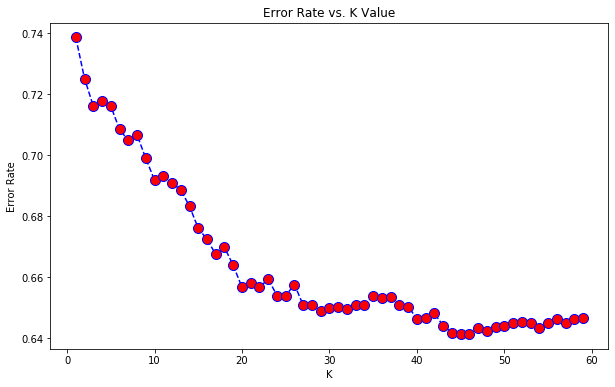

In [75]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [76]:
#K = 15
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=40')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

#little higher accuracy but still really bad 

WITH K=40


[[  0  87   2   1   0   0   0]
 [  0 696   9  19   9   5   1]
 [  0 214  17   9  18  15   2]
 [  0 211  11  27   7   6   5]
 [  0 218  13  15  21  19   4]
 [  0 224  10  15  13  20   3]
 [  0 230  11  10  16   4   5]]


              precision    recall  f1-score   support

       blink       0.00      0.00      0.00        90
      colour       0.37      0.94      0.53       739
       items       0.23      0.06      0.10       275
        math       0.28      0.10      0.15       267
       music       0.25      0.07      0.11       290
       relax       0.29      0.07      0.11       285
       video       0.25      0.02      0.03       276

    accuracy                           0.35      2222
   macro avg       0.24      0.18      0.15      2222
weighted avg       0.29      0.35      0.24      2222



C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
accText = 'KNN, Relabelled Optimized'

#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, pred, average = 'weighted')).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, pred, average = 'weighted')).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, pred, average = 'weighted')).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

# # #ROC curve
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
# roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
# print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))



  Accuracy: 35.37%
 Precision: 28.66%
    Recall: 35.37%
  F1 score: 24.01%


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
acc = pd.read_csv("accuracies.csv", index_col=0)
acc.at[accText, 'Accuracy'] = (accuracy)
acc.at[accText, 'Precision'] = (precision)
acc.at[accText, 'Recall'] = (recall)
acc.at[accText, 'F1'] = (f1)
# acc.at[accText, 'ROC'] = (roc_auc)
acc.to_csv("accuracies.csv")

# Retry with Just Wavelengths

In [79]:
features = master_label_df.drop(['Unnamed: 0', 'id', 'indra_time','reading_time', 'browser_latency', 'eeg_power', 'raw_values',
       'signal_quality', 'createdAt', 'updatedAt', 'Session', 'Seen video before?', 'Chosen color',
       'Saw icons?', 'Gender', 'Wear contacts','label','attention_esense','meditation_esense'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(features,master_label_df['label'], test_size=0.30)

In [80]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       blink       0.05      0.07      0.06        73
      colour       0.40      0.67      0.50       762
       items       0.16      0.12      0.14       271
        math       0.20      0.15      0.17       265
       music       0.16      0.11      0.13       267
       relax       0.20      0.11      0.14       290
       video       0.15      0.05      0.08       294

    accuracy                           0.30      2222
   macro avg       0.19      0.18      0.17      2222
weighted avg       0.25      0.30      0.26      2222



Even Worse

In [81]:
accText = 'KNN, Relabelled Optimized, Only Wavelengths'

#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, pred, average = 'weighted')).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, pred, average = 'weighted')).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, pred, average = 'weighted')).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

# # #ROC curve
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
# roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
# print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 29.93%
 Precision: 24.81%
    Recall: 29.93%
  F1 score: 25.66%


In [82]:
acc = pd.read_csv("accuracies.csv", index_col=0)
acc.at[accText, 'Accuracy'] = (accuracy)
acc.at[accText, 'Precision'] = (precision)
acc.at[accText, 'Recall'] = (recall)
acc.at[accText, 'F1'] = (f1)
# acc.at[accText, 'ROC'] = (roc_auc)
acc.to_csv("accuracies.csv")

# Plot  Different Labels on Graph

In [83]:
#let's visualize the differences in the labels 
master_label_df.columns

Index(['Unnamed: 0', 'id', 'indra_time', 'browser_latency', 'reading_time',
       'attention_esense', 'meditation_esense', 'eeg_power', 'raw_values',
       'signal_quality', 'createdAt', 'updatedAt', 'label', 'delta', 'theta',
       'low_alpha', 'high_alpha', 'low_beta', 'high_beta', 'low_gamma',
       'mid+gamma', 'Session', 'Seen video before?', 'Chosen color',
       'Saw icons?', 'Gender', 'Wear contacts'],
      dtype='object')

In [84]:
master_time = master_label_df.drop(['Unnamed: 0','reading_time', 'browser_latency', 'eeg_power', 'raw_values',
       'signal_quality', 'createdAt', 'updatedAt', 'Session', 'Seen video before?', 'Chosen color',
       'Saw icons?', 'Gender', 'Wear contacts'], axis = 1)

In [85]:
master_time.columns
#we are going to plot each wave as a time seriesto look for visual differences

Index(['id', 'indra_time', 'attention_esense', 'meditation_esense', 'label',
       'delta', 'theta', 'low_alpha', 'high_alpha', 'low_beta', 'high_beta',
       'low_gamma', 'mid+gamma'],
      dtype='object')

In [86]:
master_time

,id,indra_time,attention_esense,meditation_esense,label,delta,theta,low_alpha,high_alpha,low_beta,high_beta,low_gamma,mid+gamma
677,8,2015-05-09 23:32:41.663,64,67,blink,741016.0,1068203.0,253428.0,112710.0,171571.0,138093.0,19539.0,13687.0
678,8,2015-05-09 23:32:42.571,80,83,blink,9416.0,13022.0,18955.0,15597.0,8903.0,20473.0,5763.0,7271.0
679,8,2015-05-09 23:32:43.481,90,90,blink,116550.0,7062.0,10241.0,2245.0,4162.0,6597.0,1435.0,4858.0
680,8,2015-05-09 23:32:44.698,93,83,blink,13884.0,5769.0,8625.0,1837.0,6221.0,22838.0,11360.0,13625.0
681,8,2015-05-09 23:32:45.609,91,90,blink,701748.0,51032.0,24760.0,6768.0,3128.0,8376.0,4160.0,3705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26443,27,2015-05-09 23:48:48.296,84,29,colour,34004.0,9627.0,3836.0,9513.0,8240.0,80781.0,39374.0,16310.0
26444,27,2015-05-09 23:48:49.516,74,20,colour,1602302.0,202666.0,40488.0,38347.0,5081.0,26990.0,21178.0,15716.0
26445,27,2015-05-09 23:48:50.433,67,23,colour,634272.0,336226.0,67494.0,17244.0,8897.0,33338.0,49510.0,12804.0
26446,27,2015-05-09 23:48:51.346,66,24,colour,109181.0,46985.0,15022.0,17584.0,15259.0,124133.0,19728.0,11153.0


In [87]:
master_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7406 entries, 677 to 26447
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 7406 non-null   int64         
 1   indra_time         7406 non-null   datetime64[ns]
 2   attention_esense   7406 non-null   int64         
 3   meditation_esense  7406 non-null   int64         
 4   label              7406 non-null   object        
 5   delta              7406 non-null   float64       
 6   theta              7406 non-null   float64       
 7   low_alpha          7406 non-null   float64       
 8   high_alpha         7406 non-null   float64       
 9   low_beta           7406 non-null   float64       
 10  high_beta          7406 non-null   float64       
 11  low_gamma          7406 non-null   float64       
 12  mid+gamma          7406 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory

In [88]:
master_time = master_time.set_index('indra_time')


In [89]:
master_time

,id,attention_esense,meditation_esense,label,delta,theta,low_alpha,high_alpha,low_beta,high_beta,low_gamma,mid+gamma
indra_time,,,,,,,,,,,,
2015-05-09 23:32:41.663,8,64,67,blink,741016.0,1068203.0,253428.0,112710.0,171571.0,138093.0,19539.0,13687.0
2015-05-09 23:32:42.571,8,80,83,blink,9416.0,13022.0,18955.0,15597.0,8903.0,20473.0,5763.0,7271.0
2015-05-09 23:32:43.481,8,90,90,blink,116550.0,7062.0,10241.0,2245.0,4162.0,6597.0,1435.0,4858.0
2015-05-09 23:32:44.698,8,93,83,blink,13884.0,5769.0,8625.0,1837.0,6221.0,22838.0,11360.0,13625.0
2015-05-09 23:32:45.609,8,91,90,blink,701748.0,51032.0,24760.0,6768.0,3128.0,8376.0,4160.0,3705.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-09 23:48:48.296,27,84,29,colour,34004.0,9627.0,3836.0,9513.0,8240.0,80781.0,39374.0,16310.0
2015-05-09 23:48:49.516,27,74,20,colour,1602302.0,202666.0,40488.0,38347.0,5081.0,26990.0,21178.0,15716.0
2015-05-09 23:48:50.433,27,67,23,colour,634272.0,336226.0,67494.0,17244.0,8897.0,33338.0,49510.0,12804.0


In [90]:
master_time.id.unique()

array([ 8, 12,  5,  2,  4, 14,  9, 15, 13, 10,  6,  3, 11,  1,  7, 24, 25,
       20, 28, 30, 26, 22, 16, 17, 23, 19, 29, 18, 21, 27], dtype=int64)

In [91]:
%store master_time

Stored 'master_time' (DataFrame)


# Visualize Data as Time Series

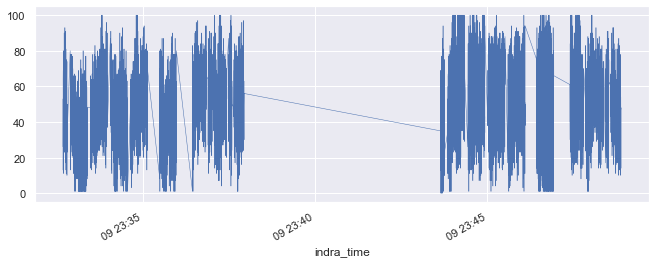

In [92]:
sns.set(rc={'figure.figsize':(11, 4)})
master_time['attention_esense'].plot(linewidth = 0.5)
#master_time['delta'].plot(linewidth = 0.5)


Text(0.5, 1.0, 'high alpha')

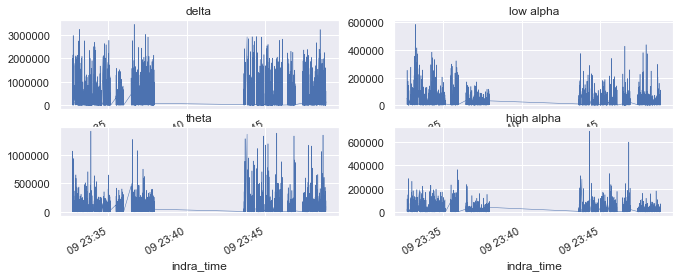

In [99]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# master_time['attention_esense'].plot(linewidth = 0.5, ax = axes[0,0])
# axes[0,0].set_title('attention_esense')
# master_time['meditation_esense'].plot(linewidth = 0.5, ax = axes[0,1])
# axes[0,0].set_title('attention_esense')
master_time['delta'].plot(linewidth = 0.5, ax = axes[0,0])
axes[0,0].set_title('delta')
master_time['theta'].plot(linewidth = 0.5, ax = axes[1,0])
axes[1,0].set_title('theta')
master_time['low_alpha'].plot(linewidth = 0.5, ax = axes[0,1])
axes[0,1].set_title('low alpha')
master_time['high_alpha'].plot(linewidth = 0.5, ax = axes[1,1])
axes[1,1].set_title('high alpha')

Text(0.5, 1.0, 'mid+ gamma')

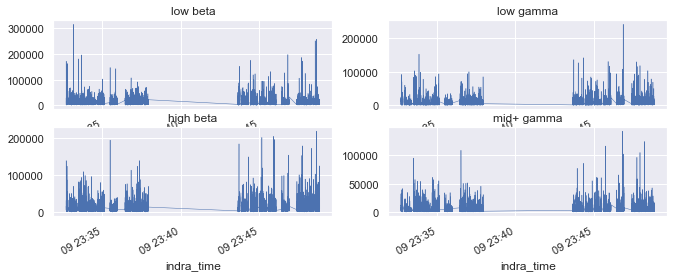

In [98]:
fig, axes = plt.subplots(nrows=2, ncols=2)

master_time['low_beta'].plot(linewidth = 0.5, ax = axes[0,0])
axes[0,0].set_title('low beta')
master_time['high_beta'].plot(linewidth = 0.5, ax = axes[1,0])
axes[1,0].set_title('high beta')
master_time['low_gamma'].plot(linewidth = 0.5, ax = axes[0,1])
axes[0,1].set_title('low gamma')
master_time['mid+gamma'].plot(linewidth = 0.5, ax = axes[1,1])
axes[1,1].set_title('mid+ gamma')

# Look at just one subject accuracy

In [100]:
time_1 = master_time.loc[master_time['id'] == 1]
time_1.label.unique()

array(['blink', 'relax', 'math', 'music', 'video', 'items', 'colour'],
      dtype=object)

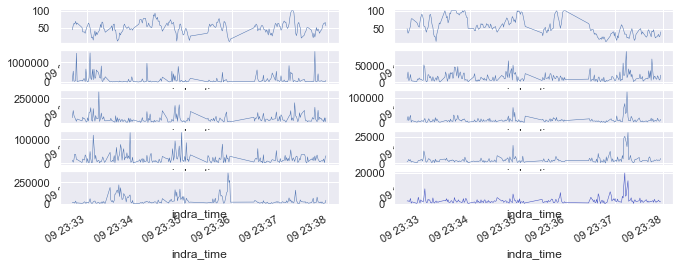

In [101]:
ig, axes = plt.subplots(nrows=5, ncols=2)
time_1['attention_esense'].plot(linewidth = 0.5, ax = axes[0,0])
time_1['meditation_esense'].plot(linewidth = 0.5, ax = axes[0,1])
time_1['delta'].plot(linewidth = 0.5, ax = axes[1,0])
time_1['theta'].plot(linewidth = 0.5, ax = axes[2,0])
time_1['low_alpha'].plot(linewidth = 0.5, ax = axes[3,0])
time_1['high_alpha'].plot(linewidth = 0.5, ax = axes[4,0])
time_1['low_beta'].plot(linewidth = 0.5, ax = axes[1,1])
time_1['high_beta'].plot(linewidth = 0.5, ax = axes[2,1])
time_1['low_gamma'].plot(linewidth = 0.5, ax = axes[3,1])
time_1['mid+gamma'].plot(linewidth = 0.5, ax = axes[4,1], colormap = 'coolwarm')


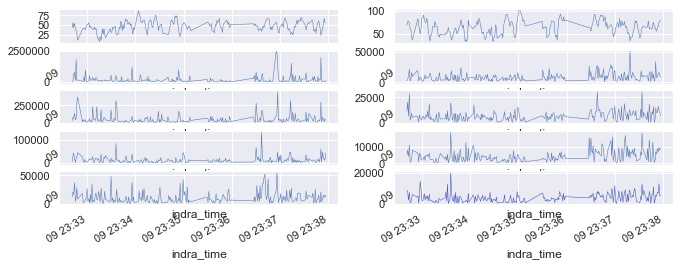

In [102]:
time_2 = master_time.loc[master_time['id'] == 2]
ig, axes = plt.subplots(nrows=5, ncols=2)
time_2['attention_esense'].plot(linewidth = 0.5, ax = axes[0,0])
time_2['meditation_esense'].plot(linewidth = 0.5, ax = axes[0,1])
time_2['delta'].plot(linewidth = 0.5, ax = axes[1,0])
time_2['theta'].plot(linewidth = 0.5, ax = axes[2,0])
time_2['low_alpha'].plot(linewidth = 0.5, ax = axes[3,0])
time_2['high_alpha'].plot(linewidth = 0.5, ax = axes[4,0])
time_2['low_beta'].plot(linewidth = 0.5, ax = axes[1,1])
time_2['high_beta'].plot(linewidth = 0.5, ax = axes[2,1])
time_2['low_gamma'].plot(linewidth = 0.5, ax = axes[3,1])
time_2['mid+gamma'].plot(linewidth = 0.5, ax = axes[4,1], colormap = 'coolwarm')

Just based on the above two subjects you can see that the EEGs are significantly different across the same activities. But at the same time you can see that there are similar peaks and troughs across them. This may indicate that we might need to try and classify on a subject by subject level because the EEGs don't correlate across people. Especially not with sample sizes as low as this. 

In [103]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)

In [109]:
accuracy_list = []
recall_list = []
precision_list = []
f1_list = [] 

for i in range(1,31):
    subject = master_time[master_time['id'] == i]
    features = subject.drop(['id', 'label'], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(features,subject['label'],
                                                    test_size=0.30)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred, average = 'weighted')
    precision = precision_score(y_test, pred, average = 'weighted')
    f1 = f1_score(y_test, pred, average = 'weighted')
    print(f'Subject {i} Results with accuracy of {round(accuracy,3)} \n')
    print(classification_report(y_test,pred))
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

Subject 1 Results with accuracy of 0.319 

              precision    recall  f1-score   support

       blink       0.00      0.00      0.00         1
      colour       0.36      0.62      0.46        21
       items       0.00      0.00      0.00        13
        math       0.25      0.33      0.29         9
       music       0.50      0.14      0.22         7
       relax       0.38      0.56      0.45         9
       video       0.33      0.08      0.13        12

    accuracy                           0.32        72
   macro avg       0.26      0.25      0.22        72
weighted avg       0.29      0.32      0.27        72

Subject 2 Results with accuracy of 0.329 

              precision    recall  f1-score   support

       blink       0.00      0.00      0.00         3
      colour       0.46      0.52      0.48        31
       items       1.00      0.09      0.17        11
        math       0.50      0.33      0.40         9
       music       0.18      0.22      0.20   

C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:127

Subject 13 Results with accuracy of 0.472 

              precision    recall  f1-score   support

       blink       0.00      0.00      0.00         2
      colour       0.48      0.91      0.63        23
       items       0.17      0.12      0.14         8
        math       0.25      0.11      0.15         9
       music       0.75      0.33      0.46         9
       relax       0.67      0.60      0.63        10
       video       0.40      0.18      0.25        11

    accuracy                           0.47        72
   macro avg       0.39      0.32      0.32        72
weighted avg       0.45      0.47      0.42        72

Subject 14 Results with accuracy of 0.306 

              precision    recall  f1-score   support

       blink       0.20      1.00      0.33         1
      colour       0.35      0.71      0.47        21
       items       0.75      0.23      0.35        13
        math       0.00      0.00      0.00         9
       music       0.33      0.43      0.38 

C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classifi

Subject 27 Results with accuracy of 0.306 

              precision    recall  f1-score   support

       blink       0.17      0.50      0.25         2
      colour       0.48      0.45      0.46        29
       items       0.17      0.25      0.20         8
        math       0.43      0.30      0.35        10
       music       0.00      0.00      0.00         7
       relax       0.29      0.33      0.31         6
       video       0.11      0.10      0.11        10

    accuracy                           0.31        72
   macro avg       0.23      0.28      0.24        72
weighted avg       0.32      0.31      0.31        72

Subject 28 Results with accuracy of 0.236 

              precision    recall  f1-score   support

       blink       0.00      0.00      0.00         2
      colour       0.28      0.68      0.39        19
       items       0.00      0.00      0.00        11
        math       0.29      0.20      0.24        10
       music       0.20      0.08      0.12 

In [114]:
# Find average accuracy 
accuracy = sum(accuracy_list)/len(accuracy_list)
precision = sum(precision_list)/len(precision_list)
recall = sum(recall_list)/len(recall_list)
f1 = sum(f1_list)/len(f1_list)

In [115]:
print(f'accuracy is {accuracy}')
print(f'precision is {precision}')
print(f'recall is {recall}')
print(f'd1_score is {f1}')

accuracy is 0.32127060727557755
precision is 0.28596747244287796
recall is 0.32127060727557755
d1_score is 0.2742691281263928


In [116]:
accText = 'KNN, per Subject'

acc = pd.read_csv("accuracies.csv", index_col=0)
acc.at[accText, 'Accuracy'] = (accuracy)
acc.at[accText, 'Precision'] = (precision)
acc.at[accText, 'Recall'] = (recall)
acc.at[accText, 'F1'] = (f1)
# acc.at[accText, 'ROC'] = (roc_auc)
acc.to_csv("accuracies.csv")

Still horrible accuracy, maybe try with cross validation?

## Cross Validation - Per Subject

In [141]:
knn = KNeighborsClassifier(n_neighbors=14)
accuracy_list = []
recall_list = []
precision_list = []
f1_list = [] 

for i in range(1,31):
    subject = master_time[master_time['id'] == i]
    features = subject.drop(['id', 'label'], axis = 1)
    accuracy_all = cross_val_score(knn, features, subject['label'], 
                             cv = 5, scoring = 'accuracy')
    precision_all = cross_val_score(knn, features, subject['label'], 
                             cv = 5, scoring = 'precision_weighted') 
    recall_all = cross_val_score(knn, features, subject['label'], 
                             cv = 5, scoring = 'recall_weighted')
    f1_all= cross_val_score(knn, features, subject['label'], 
                             cv = 5, scoring = 'f1_weighted')
    accuracy = accuracy_all.mean()
    precision = precision_all.mean()
    recall = recall_all.mean()
    f1 = f1_all.mean()
    print(f'Subject {i} Results with CV accuracy of {mean_accuracy} \n')
    print(accuracy_all)
    print(accuracy)
    
    print(f'Subject {i} Results with CV accuracy of {mean_accuracy} \n')
    print(accuracy_all)
    print(accuracy)
    
    accuracy_list.append(mean_accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Subject 1 Results with CV accuracy of 0.33333333333333337 

[0.39583333 0.39583333 0.5        0.4375     0.36170213]
0.4181737588652482
Subject 1 Results with CV accuracy of 0.33333333333333337 

[0.39583333 0.39583333 0.5        0.4375     0.36170213]
0.4181737588652482
Subject 2 Results with CV accuracy of 0.33333333333333337 

[0.36734694 0.28571429 0.3125     0.3125     0.35416667]
0.32644557823129255
Subject 2 Results with CV accuracy of 0.33333333333333337 

[0.36734694 0.28571429 0.3125     0.3125     0.35416667]
0.32644557823129255


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Subject 3 Results with CV accuracy of 0.33333333333333337 

[0.36 0.36 0.42 0.36 0.26]
0.352
Subject 3 Results with CV accuracy of 0.33333333333333337 

[0.36 0.36 0.42 0.36 0.26]
0.352
Subject 4 Results with CV accuracy of 0.33333333333333337 

[0.375      0.47916667 0.35416667 0.29166667 0.29166667]
0.3583333333333334
Subject 4 Results with CV accuracy of 0.33333333333333337 

[0.375      0.47916667 0.35416667 0.29166667 0.29166667]
0.3583333333333334


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Subject 5 Results with CV accuracy of 0.33333333333333337 

[0.33333333 0.47916667 0.35416667 0.39583333 0.36170213]
0.3848404255319149
Subject 5 Results with CV accuracy of 0.33333333333333337 

[0.33333333 0.47916667 0.35416667 0.39583333 0.36170213]
0.3848404255319149
Subject 6 Results with CV accuracy of 0.33333333333333337 

[0.22916667 0.22916667 0.27083333 0.29166667 0.25      ]
0.25416666666666665
Subject 6 Results with CV accuracy of 0.33333333333333337 

[0.22916667 0.22916667 0.27083333 0.29166667 0.25      ]
0.25416666666666665


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Subject 7 Results with CV accuracy of 0.33333333333333337 

[0.27083333 0.33333333 0.5        0.4375     0.41666667]
0.39166666666666666
Subject 7 Results with CV accuracy of 0.33333333333333337 

[0.27083333 0.33333333 0.5        0.4375     0.41666667]
0.39166666666666666
Subject 8 Results with CV accuracy of 0.33333333333333337 

[0.375      0.35416667 0.35416667 0.25531915 0.38297872]
0.34432624113475174
Subject 8 Results with CV accuracy of 0.33333333333333337 

[0.375      0.35416667 0.35416667 0.25531915 0.38297872]
0.34432624113475174


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Subject 9 Results with CV accuracy of 0.33333333333333337 

[0.35416667 0.375      0.29166667 0.3125     0.29166667]
0.32500000000000007
Subject 9 Results with CV accuracy of 0.33333333333333337 

[0.35416667 0.375      0.29166667 0.3125     0.29166667]
0.32500000000000007
Subject 10 Results with CV accuracy of 0.33333333333333337 

[0.3125     0.47916667 0.41666667 0.39583333 0.45833333]
0.4125
Subject 10 Results with CV accuracy of 0.33333333333333337 

[0.3125     0.47916667 0.41666667 0.39583333 0.45833333]
0.4125


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Subject 11 Results with CV accuracy of 0.33333333333333337 

[0.27083333 0.4375     0.3125     0.375      0.41666667]
0.3625
Subject 11 Results with CV accuracy of 0.33333333333333337 

[0.27083333 0.4375     0.3125     0.375      0.41666667]
0.3625
Subject 12 Results with CV accuracy of 0.33333333333333337 

[0.33333333 0.33333333 0.3125     0.34042553 0.29787234]
0.32349290780141843
Subject 12 Results with CV accuracy of 0.33333333333333337 

[0.33333333 0.33333333 0.3125     0.34042553 0.29787234]
0.32349290780141843


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Subject 13 Results with CV accuracy of 0.33333333333333337 

[0.39583333 0.54166667 0.39583333 0.47916667 0.5       ]
0.4625
Subject 13 Results with CV accuracy of 0.33333333333333337 

[0.39583333 0.54166667 0.39583333 0.47916667 0.5       ]
0.4625
Subject 14 Results with CV accuracy of 0.33333333333333337 

[0.3125     0.3125     0.29166667 0.41666667 0.40425532]
0.34751773049645396
Subject 14 Results with CV accuracy of 0.33333333333333337 

[0.3125     0.3125     0.29166667 0.41666667 0.40425532]
0.34751773049645396


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Subject 15 Results with CV accuracy of 0.33333333333333337 

[0.25531915 0.38297872 0.44680851 0.29787234 0.31914894]
0.34042553191489366
Subject 15 Results with CV accuracy of 0.33333333333333337 

[0.25531915 0.38297872 0.44680851 0.29787234 0.31914894]
0.34042553191489366
Subject 16 Results with CV accuracy of 0.33333333333333337 

[0.22916667 0.33333333 0.36170213 0.31914894 0.34042553]
0.3167553191489362
Subject 16 Results with CV accuracy of 0.33333333333333337 

[0.22916667 0.33333333 0.36170213 0.31914894 0.34042553]
0.3167553191489362


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Subject 17 Results with CV accuracy of 0.33333333333333337 

[0.27083333 0.35416667 0.33333333 0.35416667 0.38297872]
0.339095744680851
Subject 17 Results with CV accuracy of 0.33333333333333337 

[0.27083333 0.35416667 0.33333333 0.35416667 0.38297872]
0.339095744680851
Subject 18 Results with CV accuracy of 0.33333333333333337 

[0.35416667 0.33333333 0.39583333 0.39583333 0.42553191]
0.3809397163120567
Subject 18 Results with CV accuracy of 0.33333333333333337 

[0.35416667 0.33333333 0.39583333 0.39583333 0.42553191]
0.3809397163120567


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Subject 19 Results with CV accuracy of 0.33333333333333337 

[0.44897959 0.51020408 0.3877551  0.47916667 0.35416667]
0.43605442176870746
Subject 19 Results with CV accuracy of 0.33333333333333337 

[0.44897959 0.51020408 0.3877551  0.47916667 0.35416667]
0.43605442176870746
Subject 20 Results with CV accuracy of 0.33333333333333337 

[0.25       0.41666667 0.35416667 0.34042553 0.40425532]
0.35310283687943267
Subject 20 Results with CV accuracy of 0.33333333333333337 

[0.25       0.41666667 0.35416667 0.34042553 0.40425532]
0.35310283687943267


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Subject 21 Results with CV accuracy of 0.33333333333333337 

[0.3125     0.29166667 0.3125     0.36170213 0.31914894]
0.31950354609929077
Subject 21 Results with CV accuracy of 0.33333333333333337 

[0.3125     0.29166667 0.3125     0.36170213 0.31914894]
0.31950354609929077
Subject 22 Results with CV accuracy of 0.33333333333333337 

[0.375      0.45833333 0.27083333 0.38297872 0.38297872]
0.3740248226950354
Subject 22 Results with CV accuracy of 0.33333333333333337 

[0.375      0.45833333 0.27083333 0.38297872 0.38297872]
0.3740248226950354


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Subject 23 Results with CV accuracy of 0.33333333333333337 

[0.27083333 0.35416667 0.33333333 0.29787234 0.27659574]
0.30656028368794325
Subject 23 Results with CV accuracy of 0.33333333333333337 

[0.27083333 0.35416667 0.33333333 0.29787234 0.27659574]
0.30656028368794325
Subject 24 Results with CV accuracy of 0.33333333333333337 

[0.3125     0.35416667 0.39583333 0.29787234 0.40425532]
0.3529255319148936
Subject 24 Results with CV accuracy of 0.33333333333333337 

[0.3125     0.35416667 0.39583333 0.29787234 0.40425532]
0.3529255319148936


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Subject 25 Results with CV accuracy of 0.33333333333333337 

[0.32608696 0.23913043 0.31111111 0.31111111 0.33333333]
0.3041545893719807
Subject 25 Results with CV accuracy of 0.33333333333333337 

[0.32608696 0.23913043 0.31111111 0.31111111 0.33333333]
0.3041545893719807
Subject 26 Results with CV accuracy of 0.33333333333333337 

[0.3877551  0.39583333 0.39583333 0.4375     0.39583333]
0.4025510204081632
Subject 26 Results with CV accuracy of 0.33333333333333337 

[0.3877551  0.39583333 0.39583333 0.4375     0.39583333]
0.4025510204081632


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Subject 27 Results with CV accuracy of 0.33333333333333337 

[0.375      0.375      0.27659574 0.40425532 0.29787234]
0.34574468085106386
Subject 27 Results with CV accuracy of 0.33333333333333337 

[0.375      0.375      0.27659574 0.40425532 0.29787234]
0.34574468085106386
Subject 28 Results with CV accuracy of 0.33333333333333337 

[0.25       0.27083333 0.3125     0.25       0.23404255]
0.2634751773049645
Subject 28 Results with CV accuracy of 0.33333333333333337 

[0.25       0.27083333 0.3125     0.25       0.23404255]
0.2634751773049645


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Subject 29 Results with CV accuracy of 0.33333333333333337 

[0.37894737 0.35789474 0.44210526 0.42105263 0.44680851]
0.40936170212765954
Subject 29 Results with CV accuracy of 0.33333333333333337 

[0.37894737 0.35789474 0.44210526 0.42105263 0.44680851]
0.40936170212765954
Subject 30 Results with CV accuracy of 0.33333333333333337 

[0.27083333 0.35416667 0.35416667 0.3125     0.35416667]
0.3291666666666667
Subject 30 Results with CV accuracy of 0.33333333333333337 

[0.27083333 0.35416667 0.35416667 0.3125     0.35416667]
0.3291666666666667


In [142]:
print(f'accuracy is {accuracy}')
print(f'precision is {precision}')
print(f'recall is {recall}')
print(f'd1_score is {f1}')

accuracy is 0.3291666666666667
precision is 0.2521805355138688
recall is 0.3291666666666667
d1_score is 0.24541224858512817


In [143]:
accText = 'KNN, per Subject Cross Validation'

acc = pd.read_csv("accuracies.csv", index_col=0)
acc.at[accText, 'Accuracy'] = (accuracy)
acc.at[accText, 'Precision'] = (precision)
acc.at[accText, 'Recall'] = (recall)
acc.at[accText, 'F1'] = (f1)
# acc.at[accText, 'ROC'] = (roc_auc)
acc.to_csv("accuracies.csv")

It got a little better but not much 

# Maybe Try Another Classifier (Support Vector Machine)

## Moved to another notebook (do not run here) 

In [ ]:

# from sklearn.svm import SVC
# svm = SVC(kernel='linear', C=1, random_state = 101)
# for i in range(1,31):
#     subject = master_time[master_time['id'] == i]
#     features = subject.drop(['id', 'label'], axis = 1)
#     scores = cross_val_score(svm, features, subject['label'], 
#                              cv = 5, scoring = 'accuracy')  
#     mean_score = scores.mean()
#     print(f'Subject {i} Results with CV accuracy of {mean_score} \n')
#     print(scores)
#     print(mean_score)
#     accuracy_list.append(mean_score)
    


C:\Users\Seran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
SVC?

# Other Test Stuff 

In [ ]:
subjects_dict = dict()
for subj in range(1,30):
    subjects[subj] = master_time[master_time['id'] == subj]

In [95]:
subject_29 = master_time[master_time['id'] == subj]

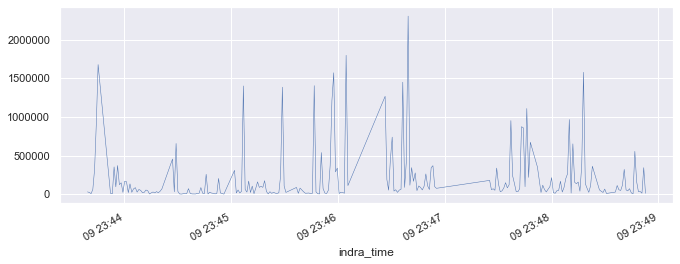

In [96]:
subject_29['delta'].plot(linewidth = 0.5)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score?